In [ ]:
'''
 * Copyright (c) 2016 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Moore-Penrose Pseudo-Inverse and Solving Linear Systems

## 1. Introduction to Linear Systems

A system of linear equations can be written in matrix form as:

$$A\mathbf{x} = \mathbf{b}$$

where $A$ is an $m \times n$ matrix, $\mathbf{x}$ is an $n \times 1$ vector of unknowns, and $\mathbf{b}$ is an $m \times 1$ vector.

## 2. Moore-Penrose Pseudo-Inverse

When $A$ is not invertible (either because it's not square or it's singular), we can use the Moore-Penrose pseudo-inverse to find a solution.

The Moore-Penrose pseudo-inverse of $A$ is denoted as $A^+$ and can be calculated as:

$$A^+ = (A^T A)^{-1} A^T$$

This gives us the minimum norm least-squares solution:

$$\mathbf{x} = A^+ \mathbf{b} = (A^T A)^{-1} A^T \mathbf{b}$$

### Disadvantages of Direct Calculation

The formula $(A^T A)^{-1} A^T$ has several computational disadvantages:
- Requires expensive matrix-matrix multiplication
- Requires computing an inverse, which is numerically unstable
- Not efficient for large systems

## 3. Alternative Methods for Solving Linear Systems

### 3.1 Gaussian Elimination

Gaussian elimination is useful for:
- Computing determinants
- Checking linear independence of vectors
- Computing matrix inverses
- Determining matrix rank
- Finding vector space bases

While intuitive for systems with thousands of variables, it becomes impractical for millions of variables due to $O(n^3)$ complexity.

### 3.2 Iterative Methods

For large systems, iterative methods are preferred:

#### Stationary Iterative Methods
- Richardson method
- Jacobi method
- Gauss-Seidel method
- Successive over-relaxation (SOR)

#### Krylov Subspace Methods
- Conjugate Gradient (CG)
- Generalized Minimal Residual (GMRES)
- Biconjugate Gradient (BiCG)

### 3.3 Iterative Approach

Let $\mathbf{x}^*$ be a solution of $A\mathbf{x} = \mathbf{b}$. Iterative methods set up an iteration:

$$\mathbf{x}^{(k+1)} = C\mathbf{x}^{(k)} + \mathbf{d}$$

for suitable matrices $C$ and vectors $\mathbf{d}$ that reduce the residual error $\|\mathbf{x}^{(k+1)} - \mathbf{x}^*\|$ in each iteration.

## 4. Vector Spaces

Vector spaces are the mathematical structures in which vectors exist. A vector space has two operations:
- Vector addition
- Scalar multiplication

These operations maintain certain properties that keep the structure intact.

## 5. Python Implementation

Let's implement the Moore-Penrose pseudo-inverse and compare it with alternative methods:

```python
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.linalg import solve

# Generate a random underdetermined system (more unknowns than equations)
m, n = 100, 150  # m equations, n unknowns where n > m
A = np.random.randn(m, n)
x_true = np.random.randn(n, 1)
b = A @ x_true + 0.01 * np.random.randn(m, 1)  # Add small noise

# Method 1: Moore-Penrose pseudo-inverse
def moore_penrose(A, b):
    start = time()
    AT = A.T
    ATA = AT @ A
    ATA_inv = np.linalg.inv(ATA)
    x = ATA_inv @ AT @ b
    end = time()
    return x, end - start

# Method 2: Using numpy's built-in pinv (more stable)
def numpy_pinv(A, b):
    start = time()
    x = np.linalg.pinv(A) @ b
    end = time()
    return x, end - start

# Method 3: Using least squares (faster and more stable)
def least_squares(A, b):
    start = time()
    x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
    end = time()
    return x, end - start

# Solve using each method
x_mp, time_mp = moore_penrose(A, b)
x_pinv, time_pinv = numpy_pinv(A, b)
x_ls, time_ls = least_squares(A, b)

# Calculate errors
error_mp = np.linalg.norm(A @ x_mp - b)
error_pinv = np.linalg.norm(A @ x_pinv - b)
error_ls = np.linalg.norm(A @ x_ls - b)

# Print results
print(f"Moore-Penrose Error: {error_mp:.6f}, Time: {time_mp:.6f}s")
print(f"NumPy Pinv Error: {error_pinv:.6f}, Time: {time_pinv:.6f}s")
print(f"Least Squares Error: {error_ls:.6f}, Time: {time_ls:.6f}s")

# Visualize solution norms (since we have an underdetermined system)
norms = [np.linalg.norm(x_mp), np.linalg.norm(x_pinv), np.linalg.norm(x_ls)]
methods = ['Moore-Penrose', 'NumPy Pinv', 'Least Squares']

plt.figure(figsize=(10, 6))
plt.bar(methods, norms)
plt.ylabel('Solution Norm')
plt.title('Comparison of Solution Norms')
plt.show()
```

## 6. Convergence of Iterative Methods

For iterative methods to converge, the spectral radius of the iteration matrix $C$ must be less than 1:

$$\rho(C) < 1$$

The convergence rate depends on the condition number of $A$:

$$\kappa(A) = \|A\| \cdot \|A^{-1}\|$$

A higher condition number generally leads to slower convergence.

## 7. Why Use Iterative Methods?

For large sparse systems, iterative methods have several advantages:
- Lower memory requirements (don't need to store full matrices)
- Can terminate early when sufficient accuracy is reached
- Can exploit sparsity patterns for computational efficiency
- Better numerical stability than direct methods involving matrix inversion

## 8. Groups and Vector Spaces

A group consists of:
- A set of elements
- An operation that combines any two elements to form a third element

For vector spaces, we have two operations:
1. Vector addition: $\mathbf{u} + \mathbf{v}$
2. Scalar multiplication: $\alpha\mathbf{v}$

These operations must satisfy certain axioms, including closure, associativity, existence of identity elements, and distributivity.

Moore-Penrose Error: 1429.573069, Time: 0.196099s
NumPy Pinv Error: 0.000000, Time: 0.463768s
Least Squares Error: 0.000000, Time: 0.076997s


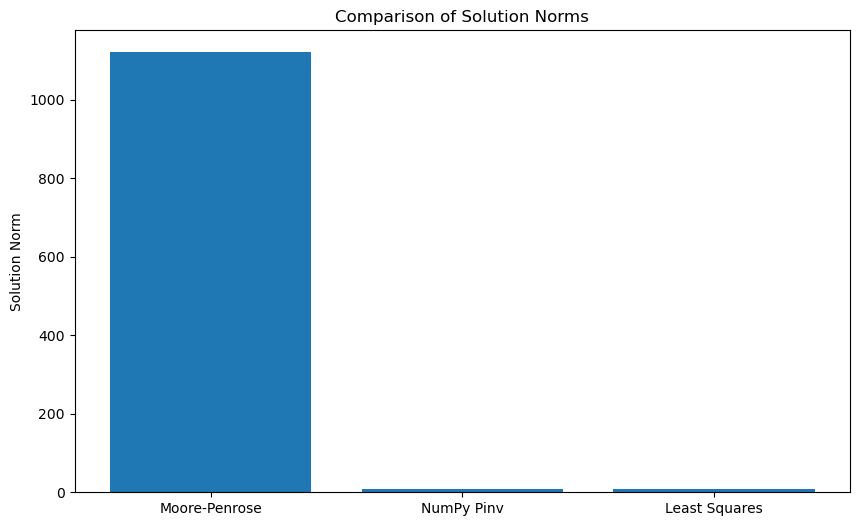

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.linalg import solve

# Generate a random underdetermined system (more unknowns than equations)
m, n = 100, 150  # m equations, n unknowns where n > m
A = np.random.randn(m, n)
x_true = np.random.randn(n, 1)
b = A @ x_true + 0.01 * np.random.randn(m, 1)  # Add small noise

# Method 1: Moore-Penrose pseudo-inverse
def moore_penrose(A, b):
    start = time()
    AT = A.T
    ATA = AT @ A
    ATA_inv = np.linalg.inv(ATA)
    x = ATA_inv @ AT @ b
    end = time()
    return x, end - start

# Method 2: Using numpy's built-in pinv (more stable)
def numpy_pinv(A, b):
    start = time()
    x = np.linalg.pinv(A) @ b
    end = time()
    return x, end - start

# Method 3: Using least squares (faster and more stable)
def least_squares(A, b):
    start = time()
    x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
    end = time()
    return x, end - start

# Solve using each method
x_mp, time_mp = moore_penrose(A, b)
x_pinv, time_pinv = numpy_pinv(A, b)
x_ls, time_ls = least_squares(A, b)

# Calculate errors
error_mp = np.linalg.norm(A @ x_mp - b)
error_pinv = np.linalg.norm(A @ x_pinv - b)
error_ls = np.linalg.norm(A @ x_ls - b)

# Print results
print(f"Moore-Penrose Error: {error_mp:.6f}, Time: {time_mp:.6f}s")
print(f"NumPy Pinv Error: {error_pinv:.6f}, Time: {time_pinv:.6f}s")
print(f"Least Squares Error: {error_ls:.6f}, Time: {time_ls:.6f}s")

# Visualize solution norms (since we have an underdetermined system)
norms = [np.linalg.norm(x_mp), np.linalg.norm(x_pinv), np.linalg.norm(x_ls)]
methods = ['Moore-Penrose', 'NumPy Pinv', 'Least Squares']

plt.figure(figsize=(10, 6))
plt.bar(methods, norms)
plt.ylabel('Solution Norm')
plt.title('Comparison of Solution Norms')
plt.show()

In [2]:
"""
Pure Python implementation of Moore-Penrose Pseudo-Inverse and linear system solvers
without using NumPy or other external libraries.
"""
import math
import random
import time


class Matrix:
    """A simple matrix class with basic operations."""
    
    def __init__(self, rows, cols=None, data=None):
        """Initialize a matrix with given dimensions.
        
        Args:
            rows: If data is provided, rows is the number of rows. 
                  Otherwise, rows can be a 2D list.
            cols: Number of columns (only used if data is None)
            data: Optional 1D list to initialize matrix in row-major order
        """
        if isinstance(rows, list):  # Initialize from 2D list
            self.rows = len(rows)
            self.cols = len(rows[0]) if self.rows > 0 else 0
            self.data = []
            for r in rows:
                self.data.extend(r)
        else:
            self.rows = rows
            self.cols = cols
            if data:
                if len(data) != rows * cols:
                    raise ValueError("Data length doesn't match matrix dimensions")
                self.data = list(data)
            else:
                self.data = [0.0] * (rows * cols)
    
    def __getitem__(self, key):
        """Access element at position (i, j)."""
        i, j = key
        if i < 0 or i >= self.rows or j < 0 or j >= self.cols:
            raise IndexError("Matrix indices out of range")
        return self.data[i * self.cols + j]
    
    def __setitem__(self, key, value):
        """Set element at position (i, j)."""
        i, j = key
        if i < 0 or i >= self.rows or j < 0 or j >= self.cols:
            raise IndexError("Matrix indices out of range")
        self.data[i * self.cols + j] = value
    
    def __str__(self):
        """String representation of the matrix."""
        result = []
        for i in range(self.rows):
            row = []
            for j in range(self.cols):
                row.append(str(self[i, j]))
            result.append(" ".join(row))
        return "\n".join(result)
    
    def __repr__(self):
        return f"Matrix({self.rows}, {self.cols})"
    
    def copy(self):
        """Return a copy of this matrix."""
        return Matrix(self.rows, self.cols, self.data.copy())
    
    @classmethod
    def zeros(cls, rows, cols):
        """Create a matrix of zeros."""
        return cls(rows, cols)
    
    @classmethod
    def identity(cls, n):
        """Create an n×n identity matrix."""
        result = cls(n, n)
        for i in range(n):
            result[i, i] = 1.0
        return result
    
    @classmethod
    def random(cls, rows, cols, min_val=-1.0, max_val=1.0):
        """Create a matrix with random values in [min_val, max_val]."""
        data = [random.uniform(min_val, max_val) for _ in range(rows * cols)]
        return cls(rows, cols, data)
    
    def transpose(self):
        """Return the transpose of this matrix."""
        result = Matrix(self.cols, self.rows)
        for i in range(self.rows):
            for j in range(self.cols):
                result[j, i] = self[i, j]
        return result
    
    def __add__(self, other):
        """Add two matrices."""
        if self.rows != other.rows or self.cols != other.cols:
            raise ValueError("Matrix dimensions must match for addition")
        
        result = Matrix(self.rows, self.cols)
        for i in range(len(self.data)):
            result.data[i] = self.data[i] + other.data[i]
        return result
    
    def __sub__(self, other):
        """Subtract two matrices."""
        if self.rows != other.rows or self.cols != other.cols:
            raise ValueError("Matrix dimensions must match for subtraction")
        
        result = Matrix(self.rows, self.cols)
        for i in range(len(self.data)):
            result.data[i] = self.data[i] - other.data[i]
        return result
    
    def __mul__(self, scalar):
        """Multiply matrix by a scalar."""
        result = Matrix(self.rows, self.cols)
        for i in range(len(self.data)):
            result.data[i] = self.data[i] * scalar
        return result
    
    def __rmul__(self, scalar):
        """Multiply matrix by a scalar (right multiplication)."""
        return self.__mul__(scalar)
    
    def dot(self, other):
        """Matrix multiplication."""
        if self.cols != other.rows:
            raise ValueError(f"Matrix dimensions incompatible for multiplication: {self.rows}x{self.cols} and {other.rows}x{other.cols}")
        
        result = Matrix(self.rows, other.cols)
        for i in range(self.rows):
            for j in range(other.cols):
                sum_val = 0.0
                for k in range(self.cols):
                    sum_val += self[i, k] * other[k, j]
                result[i, j] = sum_val
        return result
    
    def norm(self):
        """Calculate the Frobenius norm of the matrix."""
        return math.sqrt(sum(x*x for x in self.data))
    
    def to_vector(self):
        """Convert a single column matrix to a Vector."""
        if self.cols != 1:
            raise ValueError("Only single column matrices can be converted to vectors")
        return Vector(self.data)


class Vector:
    """A vector class with basic operations."""
    
    def __init__(self, data):
        """Initialize a vector with given data."""
        self.data = list(data)
        self.size = len(self.data)
    
    def __getitem__(self, i):
        """Access element at position i."""
        return self.data[i]
    
    def __setitem__(self, i, value):
        """Set element at position i."""
        self.data[i] = value
    
    def __len__(self):
        """Return the size of the vector."""
        return self.size
    
    def __str__(self):
        """String representation of the vector."""
        return "[" + ", ".join(str(x) for x in self.data) + "]"
    
    def __repr__(self):
        return f"Vector(size={self.size})"
    
    def copy(self):
        """Return a copy of this vector."""
        return Vector(self.data.copy())
    
    @classmethod
    def zeros(cls, size):
        """Create a vector of zeros."""
        return cls([0.0] * size)
    
    @classmethod
    def random(cls, size, min_val=-1.0, max_val=1.0):
        """Create a vector with random values in [min_val, max_val]."""
        data = [random.uniform(min_val, max_val) for _ in range(size)]
        return cls(data)
    
    def __add__(self, other):
        """Add two vectors."""
        if self.size != other.size:
            raise ValueError("Vector dimensions must match for addition")
        
        result = Vector.zeros(self.size)
        for i in range(self.size):
            result[i] = self[i] + other[i]
        return result
    
    def __sub__(self, other):
        """Subtract two vectors."""
        if self.size != other.size:
            raise ValueError("Vector dimensions must match for subtraction")
        
        result = Vector.zeros(self.size)
        for i in range(self.size):
            result[i] = self[i] - other[i]
        return result
    
    def __mul__(self, scalar):
        """Multiply vector by a scalar."""
        result = Vector.zeros(self.size)
        for i in range(self.size):
            result[i] = self[i] * scalar
        return result
    
    def __rmul__(self, scalar):
        """Multiply vector by a scalar (right multiplication)."""
        return self.__mul__(scalar)
    
    def dot(self, other):
        """Dot product of two vectors."""
        if self.size != other.size:
            raise ValueError("Vector dimensions must match for dot product")
        
        return sum(self[i] * other[i] for i in range(self.size))
    
    def norm(self):
        """Calculate the Euclidean norm of the vector."""
        return math.sqrt(sum(x*x for x in self.data))
    
    def to_matrix(self):
        """Convert vector to a single column matrix."""
        result = Matrix(self.size, 1)
        for i in range(self.size):
            result[i, 0] = self[i]
        return result


def inverse(matrix):
    """
    Calculate the inverse of a square matrix using Gauss-Jordan elimination.
    
    Args:
        matrix: A square Matrix object
        
    Returns:
        The inverse Matrix or raises an exception if singular
    """
    if matrix.rows != matrix.cols:
        raise ValueError("Matrix must be square to compute inverse")
    
    n = matrix.rows
    # Create an augmented matrix [A | I]
    augmented = Matrix(n, 2 * n)
    
    # Fill the augmented matrix
    for i in range(n):
        for j in range(n):
            augmented[i, j] = matrix[i, j]
        # Add identity matrix on the right
        augmented[i, i + n] = 1.0
    
    # Perform Gauss-Jordan elimination
    for i in range(n):
        # Find the pivot (maximum element in current column)
        max_row = i
        max_val = abs(augmented[i, i])
        
        for j in range(i + 1, n):
            if abs(augmented[j, i]) > max_val:
                max_val = abs(augmented[j, i])
                max_row = j
        
        if max_val < 1e-10:
            raise ValueError("Matrix is singular, cannot compute inverse")
        
        # Swap rows if needed
        if max_row != i:
            for j in range(2 * n):
                augmented[i, j], augmented[max_row, j] = augmented[max_row, j], augmented[i, j]
        
        # Scale the pivot row
        pivot = augmented[i, i]
        for j in range(i, 2 * n):
            augmented[i, j] /= pivot
        
        # Eliminate other rows
        for j in range(n):
            if j != i:
                factor = augmented[j, i]
                for k in range(i, 2 * n):
                    augmented[j, k] -= factor * augmented[i, k]
    
    # Extract the inverse from the right side of the augmented matrix
    inverse_matrix = Matrix(n, n)
    for i in range(n):
        for j in range(n):
            inverse_matrix[i, j] = augmented[i, j + n]
    
    return inverse_matrix


def moore_penrose_inverse(A):
    """
    Calculate the Moore-Penrose pseudo-inverse of matrix A.
    
    Args:
        A: Matrix object
        
    Returns:
        The pseudo-inverse Matrix A+
    """
    AT = A.transpose()
    ATA = AT.dot(A)
    
    try:
        ATA_inv = inverse(ATA)
        return ATA_inv.dot(AT)
    except ValueError:
        raise ValueError("Matrix A^T A is singular, cannot compute Moore-Penrose inverse directly")


def solve_linear_system_mp(A, b):
    """
    Solve the linear system Ax = b using Moore-Penrose pseudo-inverse.
    
    Args:
        A: Coefficient matrix
        b: Right-hand side vector or matrix
        
    Returns:
        Solution vector or matrix x
    """
    A_plus = moore_penrose_inverse(A)
    return A_plus.dot(b)


def gaussian_elimination(A, b):
    """
    Solve the linear system Ax = b using Gaussian elimination with partial pivoting.
    
    Args:
        A: Coefficient matrix
        b: Right-hand side vector (as Matrix with one column)
        
    Returns:
        Solution vector (as Matrix with one column)
    """
    if A.rows != b.rows:
        raise ValueError("Matrix dimensions incompatible")
    
    n = A.rows
    m = A.cols
    
    # Create augmented matrix [A | b]
    augmented = Matrix(n, m + 1)
    for i in range(n):
        for j in range(m):
            augmented[i, j] = A[i, j]
        augmented[i, m] = b[i, 0]
    
    # Forward elimination
    for i in range(min(n, m)):
        # Find pivot
        max_row = i
        max_val = abs(augmented[i, i])
        
        for j in range(i + 1, n):
            if abs(augmented[j, i]) > max_val:
                max_val = abs(augmented[j, i])
                max_row = j
        
        # Swap rows if needed
        if max_row != i:
            for j in range(i, m + 1):
                augmented[i, j], augmented[max_row, j] = augmented[max_row, j], augmented[i, j]
        
        # Eliminate below
        for j in range(i + 1, n):
            if abs(augmented[i, i]) < 1e-10:
                continue  # Skip if pivot is too small
                
            factor = augmented[j, i] / augmented[i, i]
            augmented[j, i] = 0.0  # Set explicitly to zero to avoid numerical issues
            
            for k in range(i + 1, m + 1):
                augmented[j, k] -= factor * augmented[i, k]
    
    # Back substitution
    x = Matrix(m, 1)
    
    # Check for inconsistent system
    for i in range(n):
        is_zero_row = all(abs(augmented[i, j]) < 1e-10 for j in range(m))
        if is_zero_row and abs(augmented[i, m]) > 1e-10:
            raise ValueError("System is inconsistent, no solution exists")
    
    # Compute solution for determined or underdetermined system
    for i in range(min(n, m) - 1, -1, -1):
        if abs(augmented[i, i]) < 1e-10:
            x[i, 0] = 0.0  # Set free variable to zero (minimum norm solution)
            continue
            
        sum_val = augmented[i, m]
        for j in range(i + 1, m):
            sum_val -= augmented[i, j] * x[j, 0]
        
        x[i, 0] = sum_val / augmented[i, i]
    
    return x


def jacobi_method(A, b, max_iterations=100, tolerance=1e-6):
    """
    Solve the linear system Ax = b using the Jacobi iterative method.
    
    Args:
        A: Coefficient matrix (should be diagonally dominant for convergence)
        b: Right-hand side vector (as Matrix with one column)
        max_iterations: Maximum number of iterations
        tolerance: Convergence tolerance
        
    Returns:
        Solution vector (as Matrix with one column)
    """
    if A.rows != A.cols or A.rows != b.rows:
        raise ValueError("Matrix dimensions incompatible")
    
    n = A.rows
    x = Matrix(n, 1)  # Initial guess (all zeros)
    x_new = Matrix(n, 1)
    
    for iteration in range(max_iterations):
        for i in range(n):
            if abs(A[i, i]) < 1e-10:
                raise ValueError("Diagonal element too close to zero")
                
            sum_val = b[i, 0]
            for j in range(n):
                if j != i:
                    sum_val -= A[i, j] * x[j, 0]
            
            x_new[i, 0] = sum_val / A[i, i]
        
        # Check convergence
        diff = 0.0
        for i in range(n):
            diff += abs(x_new[i, 0] - x[i, 0])
        
        # Update x for next iteration
        for i in range(n):
            x[i, 0] = x_new[i, 0]
        
        if diff < tolerance:
            return x
    
    print(f"Warning: Jacobi method did not converge in {max_iterations} iterations")
    return x


def gauss_seidel_method(A, b, max_iterations=100, tolerance=1e-6):
    """
    Solve the linear system Ax = b using the Gauss-Seidel iterative method.
    
    Args:
        A: Coefficient matrix (should be diagonally dominant for convergence)
        b: Right-hand side vector (as Matrix with one column)
        max_iterations: Maximum number of iterations
        tolerance: Convergence tolerance
        
    Returns:
        Solution vector (as Matrix with one column)
    """
    if A.rows != A.cols or A.rows != b.rows:
        raise ValueError("Matrix dimensions incompatible")
    
    n = A.rows
    x = Matrix(n, 1)  # Initial guess (all zeros)
    
    for iteration in range(max_iterations):
        max_diff = 0.0
        
        for i in range(n):
            if abs(A[i, i]) < 1e-10:
                raise ValueError("Diagonal element too close to zero")
                
            sum_val = b[i, 0]
            
            # Use updated values for already computed elements
            for j in range(i):
                sum_val -= A[i, j] * x[j, 0]
                
            # Use previous iteration values for later elements
            for j in range(i + 1, n):
                sum_val -= A[i, j] * x[j, 0]
            
            new_value = sum_val / A[i, i]
            diff = abs(new_value - x[i, 0])
            max_diff = max(max_diff, diff)
            x[i, 0] = new_value
        
        if max_diff < tolerance:
            return x
    
    print(f"Warning: Gauss-Seidel method did not converge in {max_iterations} iterations")
    return x


def conjugate_gradient(A, b, max_iterations=100, tolerance=1e-6):
    """
    Solve the linear system Ax = b using the Conjugate Gradient method.
    A must be symmetric and positive definite.
    
    Args:
        A: Coefficient matrix (symmetric, positive definite)
        b: Right-hand side vector (as Matrix with one column)
        max_iterations: Maximum number of iterations
        tolerance: Convergence tolerance
        
    Returns:
        Solution vector (as Matrix with one column)
    """
    if A.rows != A.cols or A.rows != b.rows:
        raise ValueError("Matrix dimensions incompatible")
    
    n = A.rows
    x = Matrix(n, 1)  # Initial guess (all zeros)
    
    # Initial residual r = b - Ax
    r = b.copy()  # Since x is zero, r = b initially
    
    # Initial search direction = residual
    p = r.copy()
    
    # Initial squared residual
    r_squared = 0.0
    for i in range(n):
        r_squared += r[i, 0] * r[i, 0]
    
    for iteration in range(max_iterations):
        # Calculate Ap
        Ap = A.dot(p)
        
        # Calculate step size alpha
        p_dot_Ap = 0.0
        for i in range(n):
            p_dot_Ap += p[i, 0] * Ap[i, 0]
        
        if abs(p_dot_Ap) < 1e-10:
            break  # Almost zero, can't proceed
            
        alpha = r_squared / p_dot_Ap
        
        # Update x and residual
        for i in range(n):
            x[i, 0] += alpha * p[i, 0]
            r[i, 0] -= alpha * Ap[i, 0]
        
        # Calculate new squared residual
        new_r_squared = 0.0
        for i in range(n):
            new_r_squared += r[i, 0] * r[i, 0]
        
        # Check convergence
        if math.sqrt(new_r_squared) < tolerance:
            return x
        
        # Update search direction
        beta = new_r_squared / r_squared
        for i in range(n):
            p[i, 0] = r[i, 0] + beta * p[i, 0]
        
        r_squared = new_r_squared
    
    print(f"Warning: Conjugate Gradient method did not converge in {max_iterations} iterations")
    return x


def demonstrate():
    """Demonstrate the different methods to solve a linear system."""
    # Create a simple system Ax = b
    A = Matrix([
        [4.0, 1.0],
        [1.0, 3.0]
    ])
    
    b = Matrix([
        [1.0],
        [2.0]
    ])
    
    print("Original system:")
    print("A:")
    print(A)
    print("\nb:")
    print(b)
    
    print("\nSolving using Moore-Penrose pseudo-inverse:")
    start_time = time.time()
    x_mp = solve_linear_system_mp(A, b)
    mp_time = time.time() - start_time
    print(x_mp)
    print(f"Time: {mp_time:.6f} seconds")
    
    print("\nSolving using Gaussian elimination:")
    start_time = time.time()
    x_ge = gaussian_elimination(A, b)
    ge_time = time.time() - start_time
    print(x_ge)
    print(f"Time: {ge_time:.6f} seconds")
    
    print("\nSolving using Jacobi method:")
    start_time = time.time()
    x_jacobi = jacobi_method(A, b)
    jacobi_time = time.time() - start_time
    print(x_jacobi)
    print(f"Time: {jacobi_time:.6f} seconds")
    
    print("\nSolving using Gauss-Seidel method:")
    start_time = time.time()
    x_gs = gauss_seidel_method(A, b)
    gs_time = time.time() - start_time
    print(x_gs)
    print(f"Time: {gs_time:.6f} seconds")
    
    print("\nSolving using Conjugate Gradient method:")
    start_time = time.time()
    x_cg = conjugate_gradient(A, b)
    cg_time = time.time() - start_time
    print(x_cg)
    print(f"Time: {cg_time:.6f} seconds")
    
    # Verify the results
    print("\nVerification: A*x should be approximately equal to b")
    for method_name, x in [
        ("Moore-Penrose", x_mp),
        ("Gaussian elimination", x_ge),
        ("Jacobi", x_jacobi),
        ("Gauss-Seidel", x_gs),
        ("Conjugate Gradient", x_cg)
    ]:
        result = A.dot(x)
        error = 0.0
        for i in range(b.rows):
            error += abs(result[i, 0] - b[i, 0])
        print(f"{method_name} error: {error:.10f}")


def test_underdetermined():
    """Test with an underdetermined system (more unknowns than equations)."""
    # Create an underdetermined system with 2 equations and 3 unknowns
    A = Matrix([
        [1.0, 2.0, 3.0],
        [4.0, 5.0, 6.0]
    ])
    
    b = Matrix([
        [5.0],
        [6.0]
    ])
    
    print("\nUnderdetermined system (2 equations, 3 unknowns):")
    print("A:")
    print(A)
    print("\nb:")
    print(b)
    
    try:
        print("\nSolving using Moore-Penrose pseudo-inverse (minimum norm solution):")
        x_mp = solve_linear_system_mp(A, b)
        print(x_mp)
        
        print("\nVerification: A*x should be approximately equal to b")
        result = A.dot(x_mp)
        print("A*x:")
        print(result)
        
        error = 0.0
        for i in range(b.rows):
            error += abs(result[i, 0] - b[i, 0])
        print(f"Error: {error:.10f}")
    except Exception as e:
        print(f"Error: {e}")


def test_overdetermined():
    """Test with an overdetermined system (more equations than unknowns)."""
    # Create an overdetermined system with 3 equations and 2 unknowns
    A = Matrix([
        [1.0, 2.0],
        [3.0, 4.0],
        [5.0, 6.0]
    ])
    
    b = Matrix([
        [7.0],
        [10.0],
        [13.0]
    ])
    
    print("\nOverdetermined system (3 equations, 2 unknowns):")
    print("A:")
    print(A)
    print("\nb:")
    print(b)
    
    try:
        print("\nSolving using Moore-Penrose pseudo-inverse (least squares solution):")
        x_mp = solve_linear_system_mp(A, b)
        print(x_mp)
        
        print("\nVerification: A*x should be approximately equal to b")
        result = A.dot(x_mp)
        print("A*x:")
        print(result)
        
        error = 0.0
        for i in range(b.rows):
            error += abs(result[i, 0] - b[i, 0])
        print(f"Error: {error:.10f}")
    except Exception as e:
        print(f"Error: {e}")


if __name__ == "__main__":
    print("=== Linear System Solvers Demonstration ===")
    demonstrate()
    test_underdetermined()
    test_overdetermined()

=== Linear System Solvers Demonstration ===
Original system:
A:
4.0 1.0
1.0 3.0

b:
1.0
2.0

Solving using Moore-Penrose pseudo-inverse:
0.09090909090909088
0.6363636363636364
Time: 0.000175 seconds

Solving using Gaussian elimination:
0.09090909090909091
0.6363636363636364
Time: 0.000071 seconds

Solving using Jacobi method:
0.09090914418831447
0.6363636465120599
Time: 0.000328 seconds

Solving using Gauss-Seidel method:
0.09090914418831447
0.6363636186038951
Time: 0.000125 seconds

Solving using Conjugate Gradient method:
0.09090909090909091
0.6363636363636364
Time: 0.000258 seconds

Verification: A*x should be approximately equal to b
Moore-Penrose error: 0.0000000000
Gaussian elimination error: 0.0000000000
Jacobi error: 0.0000003070
Gauss-Seidel error: 0.0000001954
Conjugate Gradient error: 0.0000000000

Underdetermined system (2 equations, 3 unknowns):
A:
1.0 2.0 3.0
4.0 5.0 6.0

b:
5.0
6.0

Solving using Moore-Penrose pseudo-inverse (minimum norm solution):
Error: Matrix A^T A i

# Groups in Mathematics and Computer Science

## 2.4.1 Groups

Groups play an important role in computer science. They provide a fundamental framework for operations on sets and are heavily used in cryptography, coding theory, and graphics.

### Definition of a Group

$$\text{Definition 2.7 (Group).}$$ Consider a set $G$ and an operation $\otimes : G \times G \rightarrow G$ defined on $G$. Then $\mathcal{G} := (G, \otimes)$ is called a group if the following properties hold:

1. **Closure of $G$ under $\otimes$**: $\forall x, y \in G : x \otimes y \in G$
2. **Associativity**: $\forall x, y, z \in G : (x \otimes y) \otimes z = x \otimes (y \otimes z)$
3. **Neutral element**: $\exists e \in G \; \forall x \in G : x \otimes e = x \text{ and } e \otimes x = x$
4. **Inverse element**: $\forall x \in G \; \exists y \in G : x \otimes y = e \text{ and } y \otimes x = e$, where $e$ is the neutral element. We often write $x^{-1}$ to denote the inverse element of $x$.

**Remark:** The inverse element is defined with respect to the operation $\otimes$ and does not necessarily mean $\frac{1}{x}$.

If additionally $\forall x, y \in G : x \otimes y = y \otimes x$, then $\mathcal{G} = (G, \otimes)$ is an **Abelian group** (commutative).

### Examples of Groups

Let's examine some examples of sets with associated operations and determine whether they form groups:

#### Example 2.10 (Groups)

1. $(\mathbb{Z}, +)$ is an Abelian group.
   - Closure: Sum of integers is an integer
   - Associativity: $(a + b) + c = a + (b + c)$ for all $a, b, c \in \mathbb{Z}$
   - Neutral element: $0$
   - Inverse elements: $-a$ for any $a \in \mathbb{Z}$
   - Commutativity: $a + b = b + a$ for all $a, b \in \mathbb{Z}$

2. $(\mathbb{N}_0, +)$ is not a group:
   - Although $(\mathbb{N}_0, +)$ possesses a neutral element (0), the inverse elements are missing.
   - For example, $2 \in \mathbb{N}_0$ but $-2 \notin \mathbb{N}_0$

3. $(\mathbb{Z}, \cdot)$ is not a group:
   - Although $(\mathbb{Z}, \cdot)$ contains a neutral element (1), the inverse elements for any $z \in \mathbb{Z}, z \neq \pm 1$, are missing.
   - For example, $2 \in \mathbb{Z}$ but $\frac{1}{2} \notin \mathbb{Z}$

4. $(\mathbb{R}, \cdot)$ is not a group since 0 does not possess an inverse element.
   - There is no $x \in \mathbb{R}$ such that $0 \cdot x = 1$

5. $(\mathbb{R}\setminus\{0\}, \cdot)$ is Abelian.
   - Closure: Product of non-zero reals is non-zero
   - Associativity: $(a \cdot b) \cdot c = a \cdot (b \cdot c)$ for all $a, b, c \in \mathbb{R}\setminus\{0\}$
   - Neutral element: $1$
   - Inverse elements: $\frac{1}{a}$ for any $a \in \mathbb{R}\setminus\{0\}$
   - Commutativity: $a \cdot b = b \cdot a$ for all $a, b \in \mathbb{R}\setminus\{0\}$

6. $(\mathbb{R}^n, +)$, $(\mathbb{Z}^n, +)$, $n \in \mathbb{N}$ are Abelian if $+$ is defined componentwise, i.e.,
   $$
   (x_1, \ldots, x_n) + (y_1, \ldots, y_n) = (x_1 + y_1, \ldots, x_n + y_n)
   $$
   
   Then, $(x_1, \ldots, x_n)^{-1} := (-x_1, \ldots, -x_n)$ is the inverse element and $e = (0, \ldots, 0)$ is the neutral element.

7. $(\mathbb{R}^{m \times n}, +)$, the set of $m \times n$-matrices is Abelian (with componentwise addition as defined above).

8. Let's examine $(\mathbb{R}^{n \times n}, \cdot)$, i.e., the set of $n \times n$-matrices with matrix multiplication:
   - Closure and associativity follow directly from the definition of matrix multiplication.
   - Neutral element: The identity matrix $I_n$ is the neutral element with respect to matrix multiplication "$\cdot$" in $(\mathbb{R}^{n \times n}, \cdot)$.
   - For inverse elements, not all matrices have inverses. Only matrices with non-zero determinant (invertible/non-singular matrices) have inverse elements.
   - Therefore, $(\mathbb{R}^{n \times n}, \cdot)$ is not a group.

9. $\text{GL}(n, \mathbb{R}) = \{A \in \mathbb{R}^{n \times n} \mid \det(A) \neq 0\}$, the general linear group, with matrix multiplication is a group (but not Abelian for $n \geq 2$).

## Python Implementation: Testing Group Properties

Let's implement a Python function to test whether a given set with an operation forms a group:


```python
class Group:
    """
    A class to represent a group and test group properties.
    """
    
    def __init__(self, elements, operation, identity_element):
        """
        Initialize a group with elements, operation, and identity.
        
        Parameters:
        - elements: List of elements in the set
        - operation: Function that takes two elements and returns their operation result
        - identity_element: The identity element of the set under the operation
        """
        self.elements = elements
        self.operation = operation
        self.identity_element = identity_element
    
    def is_closed(self):
        """Test if the set is closed under the operation."""
        for x in self.elements:
            for y in self.elements:
                result = self.operation(x, y)
                if result not in self.elements:
                    return False, f"Closure violated: {x} ⊗ {y} = {result} not in set"
        return True, "Closure property holds"
    
    def is_associative(self):
        """Test if the operation is associative."""
        for x in self.elements:
            for y in self.elements:
                for z in self.elements:
                    left = self.operation(self.operation(x, y), z)
                    right = self.operation(x, self.operation(y, z))
                    if left != right:
                        return False, f"Associativity violated: ({x} ⊗ {y}) ⊗ {z} = {left} ≠ {right} = {x} ⊗ ({y} ⊗ {z})"
        return True, "Associativity property holds"
    
    def has_identity(self):
        """Test if the identity element works for all elements."""
        for x in self.elements:
            left = self.operation(x, self.identity_element)
            right = self.operation(self.identity_element, x)
            if left != x or right != x:
                return False, f"Identity violated: {x} ⊗ e = {left} or e ⊗ {x} = {right}, should be {x}"
        return True, "Identity property holds"
    
    def has_inverses(self):
        """Test if every element has an inverse."""
        for x in self.elements:
            found_inverse = False
            for y in self.elements:
                if (self.operation(x, y) == self.identity_element and 
                    self.operation(y, x) == self.identity_element):
                    found_inverse = True
                    break
            if not found_inverse:
                return False, f"No inverse found for element {x}"
        return True, "Inverse property holds"
    
    def is_abelian(self):
        """Test if the operation is commutative (Abelian)."""
        for x in self.elements:
            for y in self.elements:
                if self.operation(x, y) != self.operation(y, x):
                    return False, f"Commutativity violated: {x} ⊗ {y} ≠ {y} ⊗ {x}"
        return True, "Group is Abelian"
    
    def is_group(self):
        """Test if the set with the operation forms a group."""
        closure, closure_msg = self.is_closed()
        if not closure:
            return False, closure_msg
        
        associative, assoc_msg = self.is_associative()
        if not associative:
            return False, assoc_msg
        
        identity, identity_msg = self.has_identity()
        if not identity:
            return False, identity_msg
        
        inverses, inverses_msg = self.has_inverses()
        if not inverses:
            return False, inverses_msg
        
        abelian, abelian_msg = self.is_abelian()
        
        return True, f"Valid group. {abelian_msg if abelian else 'Group is not Abelian'}"
```

### Example: Testing $(\mathbb{Z}_4, +)$

Let's test the group properties for modular addition on integers modulo 4:


```python
def modular_addition(x, y, modulus=4):
    """Addition in modular arithmetic."""
    return (x + y) % modulus

# Z4 = {0, 1, 2, 3} with modular addition
Z4_elements = [0, 1, 2, 3]
Z4_group = Group(Z4_elements, modular_addition, 0)

is_group, message = Z4_group.is_group()
print(f"Is (Z4, +) a group? {is_group}")
print(message)
```

### Example: Testing $(\mathbb{Z}, \cdot)$

Let's verify that the integers under multiplication don't form a group:


```python
def integer_multiplication(x, y):
    """Regular integer multiplication."""
    return x * y

# We'll test with a finite subset of Z
Z_subset = [-2, -1, 0, 1, 2]
Z_mult_group = Group(Z_subset, integer_multiplication, 1)

is_group, message = Z_mult_group.is_group()
print(f"Is (Z, ·) a group? {is_group}")
print(message)
```

## Applications of Groups in Computer Science

Groups have numerous applications in computer science:

1. **Cryptography**:
   - Elliptic curve groups for elliptic curve cryptography
   - Cyclic groups for RSA and Diffie-Hellman key exchange
   - Groups modulo prime numbers for many encryption algorithms

2. **Coding Theory**:
   - Error-correcting codes often rely on group properties
   - Linear codes can be represented as subgroups

3. **Computer Graphics**:
   - Rotation, reflection, and translation form groups under composition
   - The special orthogonal group SO(3) represents 3D rotations
   - Transformation matrices utilize group properties

4. **Quantum Computing**:
   - Quantum gates form groups under composition
   - Pauli matrices form a group related to quantum operations

5. **Automata Theory**:
   - Transformation semigroups and groups in finite automata
   - Syntactic monoids in language recognition

6. **Algorithms**:
   - Group-based data structures
   - Fast modular exponentiation using group properties

## Conclusion

Understanding groups provides essential insights into the algebraic structure of many mathematical and computational systems. The group axioms (closure, associativity, identity, and inverses) give us a framework for analyzing operations on sets and developing algorithms that leverage these properties.

When working with linear algebra, recognizing which structures form groups helps in understanding the theoretical foundations of vector spaces, which we'll explore further in the next sections.

In [6]:
class Group:
    """
    A class to represent a group and test group properties.
    """
    
    def __init__(self, elements, operation, identity_element):
        """
        Initialize a group with elements, operation, and identity.
        
        Parameters:
        - elements: List of elements in the set
        - operation: Function that takes two elements and returns their operation result
        - identity_element: The identity element of the set under the operation
        """
        self.elements = elements
        self.operation = operation
        self.identity_element = identity_element
    
    def is_closed(self):
        """Test if the set is closed under the operation."""
        for x in self.elements:
            for y in self.elements:
                result = self.operation(x, y)
                if result not in self.elements:
                    return False, f"Closure violated: {x} ⊗ {y} = {result} not in set"
        return True, "Closure property holds"
    
    def is_associative(self):
        """Test if the operation is associative."""
        for x in self.elements:
            for y in self.elements:
                for z in self.elements:
                    left = self.operation(self.operation(x, y), z)
                    right = self.operation(x, self.operation(y, z))
                    if left != right:
                        return False, f"Associativity violated: ({x} ⊗ {y}) ⊗ {z} = {left} ≠ {right} = {x} ⊗ ({y} ⊗ {z})"
        return True, "Associativity property holds"
    
    def has_identity(self):
        """Test if the identity element works for all elements."""
        for x in self.elements:
            left = self.operation(x, self.identity_element)
            right = self.operation(self.identity_element, x)
            if left != x or right != x:
                return False, f"Identity violated: {x} ⊗ e = {left} or e ⊗ {x} = {right}, should be {x}"
        return True, "Identity property holds"
    
    def has_inverses(self):
        """Test if every element has an inverse."""
        for x in self.elements:
            found_inverse = False
            for y in self.elements:
                if (self.operation(x, y) == self.identity_element and 
                    self.operation(y, x) == self.identity_element):
                    found_inverse = True
                    break
            if not found_inverse:
                return False, f"No inverse found for element {x}"
        return True, "Inverse property holds"
    
    def is_abelian(self):
        """Test if the operation is commutative (Abelian)."""
        for x in self.elements:
            for y in self.elements:
                if self.operation(x, y) != self.operation(y, x):
                    return False, f"Commutativity violated: {x} ⊗ {y} ≠ {y} ⊗ {x}"
        return True, "Group is Abelian"
    
    def is_group(self):
        """Test if the set with the operation forms a group."""
        closure, closure_msg = self.is_closed()
        if not closure:
            return False, closure_msg
        
        associative, assoc_msg = self.is_associative()
        if not associative:
            return False, assoc_msg
        
        identity, identity_msg = self.has_identity()
        if not identity:
            return False, identity_msg
        
        inverses, inverses_msg = self.has_inverses()
        if not inverses:
            return False, inverses_msg
        
        abelian, abelian_msg = self.is_abelian()
        
        return True, f"Valid group. {abelian_msg if abelian else 'Group is not Abelian'}"


### Example: Testing $(\mathbb{Z}_4, +)$

## Let's test the group properties for modular addition on integers modulo 4:



def modular_addition(x, y, modulus=4):
    """Addition in modular arithmetic."""
    return (x + y) % modulus

# Z4 = {0, 1, 2, 3} with modular addition
Z4_elements = [0, 1, 2, 3]
Z4_group = Group(Z4_elements, modular_addition, 0)

is_group, message = Z4_group.is_group()
print(f"Is (Z4, +) a group? {is_group}")
print(message)


### Example: Testing $(\mathbb{Z}, \cdot)$

#et's verify that the integers under multiplication don't form a group:


def integer_multiplication(x, y):
    """Regular integer multiplication."""
    return x * y

# We'll test with a finite subset of Z
Z_subset = [-2, -1, 0, 1, 2]
Z_mult_group = Group(Z_subset, integer_multiplication, 1)

is_group, message = Z_mult_group.is_group()
print(f"Is (Z, ·) a group? {is_group}")
print(message)


Is (Z4, +) a group? True
Valid group. Group is Abelian
Is (Z, ·) a group? False
Closure violated: -2 ⊗ -2 = 4 not in set


## 2.4.1 The General Linear Group

- **Inverse element:** If the inverse of a square matrix $A \in \mathbb{R}^{n \times n}$ exists (i.e., $A$ is regular or invertible), then $A^{-1}$ is its inverse element. In precisely this case, the set of $n \times n$ real matrices under matrix multiplication $(\mathbb{R}^{n \times n}, \cdot)$ forms a group known as the **general linear group**.

**Definition 2.8 (General Linear Group).** The set of regular (invertible) matrices $A \in \mathbb{R}^{n \times n}$ forms a group with respect to matrix multiplication as defined in (2.13) and is called the **general linear group**, denoted by $GL(n, \mathbb{R})$.

It is important to note that matrix multiplication is generally not commutative ($AB \neq BA$ for most matrices $A$ and $B$). Therefore, the general linear group $GL(n, \mathbb{R})$ is a **non-Abelian** group.

## 2.4.2 Vector Spaces

When discussing groups, we examined sets $G$ equipped with an inner operation $\cdot: G \times G \rightarrow G$ that operates solely on elements within $G$. Now, we will consider sets that possess not only an inner operation $+$ but also an outer operation $\cdot$, which involves the multiplication of a vector $\mathbf{x} \in G$ by a scalar $\lambda \in \mathbb{R}$. We can intuitively think of the inner operation as a form of addition and the outer operation as a form of scaling. It's crucial to understand that these inner and outer operations are distinct from inner and outer products, which will be discussed later.

**Definition 2.9 (Vector Space).** A real-valued **vector space** $V = (V, +, \cdot)$ is a set $V$ with two operations:

1.  **Vector Addition:** $+: V \times V \rightarrow V \quad (2.62)$
2.  **Scalar Multiplication:** $\cdot: \mathbb{R} \times V \rightarrow V \quad (2.63)$

These operations must satisfy the following axioms:

1.  **(V, +) is an Abelian group:**
    -   **Closure:** For all $\mathbf{x}, \mathbf{y} \in V$, $\mathbf{x} + \mathbf{y} \in V$.
    -   **Associativity:** For all $\mathbf{x}, \mathbf{y}, \mathbf{z} \in V$, $(\mathbf{x} + \mathbf{y}) + \mathbf{z} = \mathbf{x} + (\mathbf{y} + \mathbf{z})$.
    -   **Identity Element:** There exists a **zero vector** $\mathbf{0} \in V$ such that for all $\mathbf{x} \in V$, $\mathbf{x} + \mathbf{0} = \mathbf{0} + \mathbf{x} = \mathbf{x}$. The zero vector in $\mathbb{R}^n$ is $\mathbf{0} = [0, \ldots, 0]^\top$.
    -   **Inverse Element:** For every $\mathbf{x} \in V$, there exists an additive inverse $-\mathbf{x} \in V$ such that $\mathbf{x} + (-\mathbf{x}) = (-\mathbf{x}) + \mathbf{x} = \mathbf{0}$.
    -   **Commutativity:** For all $\mathbf{x}, \mathbf{y} \in V$, $\mathbf{x} + \mathbf{y} = \mathbf{y} + \mathbf{x}$.

2.  **Distributivity:**
    1.  $\forall \lambda \in \mathbb{R}, \mathbf{x}, \mathbf{y} \in V : \lambda \cdot (\mathbf{x} + \mathbf{y}) = \lambda \cdot \mathbf{x} + \lambda \cdot \mathbf{y}$
    2.  $\forall \lambda, \psi \in \mathbb{R}, \mathbf{x} \in V : (\lambda + \psi) \cdot \mathbf{x} = \lambda \cdot \mathbf{x} + \psi \cdot \mathbf{x}$

3.  **Associativity (outer operation):**
    $\forall \lambda, \psi \in \mathbb{R}, \mathbf{x} \in V : \lambda \cdot (\psi \cdot \mathbf{x}) = (\lambda \psi) \cdot \mathbf{x}$

4.  **Neutral element with respect to the outer operation:**
    $\forall \mathbf{x} \in V : 1 \cdot \mathbf{x} = \mathbf{x}$

The elements $\mathbf{x} \in V$ are called **vectors**, and the inner operation $+$ is called **vector addition**. The elements $\lambda \in \mathbb{R}$ are called **scalars**, and the outer operation $\cdot$ is **multiplication by scalars**. Remember that a scalar product is a different concept, which will be introduced in Section 3.2.

**Remark.** A "vector multiplication" $\mathbf{a}\mathbf{b}$, where $\mathbf{a}, \mathbf{b} \in \mathbb{R}^n$, is not defined under the standard rules of matrix algebra when treating vectors as $n \times 1$ matrices. While one could theoretically define an element-wise multiplication such that $\mathbf{c} = \mathbf{a}\mathbf{b}$ with $c_j = a_j b_j$, this "array multiplication" has limited mathematical significance within the standard framework of matrix multiplication.

In [7]:
def vector_add_core(v, w):
    """Adds two vectors (lists) element-wise."""
    if len(v) != len(w):
        raise ValueError("Vectors must have the same length for addition.")
    return [v_i + w_i for v_i, w_i in zip(v, w)]

def scalar_multiply_core(scalar, v):
    """Multiplies a vector (list) by a scalar."""
    return [scalar * v_i for v_i in v]

def is_abelian_group_core(V, add_func):
    """
    Checks if a set V with an addition function forms an Abelian group.
    Note: This function requires the set V to be finite and provided explicitly
          for comprehensive checking. For infinite vector spaces, we rely on
          the axioms being satisfied by the operation.
    """
    if not V:
        return False

    # Closure (assuming add_func correctly implements closure)

    # Associativity (checking for a subset)
    n = len(V)
    if n >= 3:
        v1, v2, v3 = V[0], V[1], V[2]
        if add_func(add_func(v1, v2), v3) != add_func(v1, add_func(v2, v3)):
            print("Associativity fails for:", v1, v2, v3)
            return False

    # Identity Element (zero vector)
    zero_vector = [0] * len(V[0]) if V and isinstance(V[0], list) else 0
    if not any(add_func(v, zero_vector) == v and add_func(zero_vector, v) == v for v in V):
        print("Identity element (zero vector) not found or property fails.")
        return False

    # Inverse Element (additive inverse)
    for v in V:
        negative_v = scalar_multiply_core(-1, v)
        if not any(add_func(v, negative_v) == zero_vector and add_func(negative_v, v) == zero_vector for zero_v in [zero_vector]):
            print("Inverse element not found for:", v)
            return False

    # Commutativity (checking for a subset)
    if n >= 2:
        v1, v2 = V[0], V[1]
        if add_func(v1, v2) != add_func(v2, v1):
            print("Commutativity fails for:", v1, v2)
            return False

    return True

def check_vector_space_axioms_core(V, add_func, scalar_mult_func):
    """
    Checks the vector space axioms for a set V with addition and scalar
    multiplication functions.

    Note: This function provides checks for the distributive and associative
          properties with scalars using example vectors and scalars. A
          full proof would require mathematical reasoning about the functions
          themselves.
    """
    if not V:
        print("Vector space V is empty.")
        return False

    # Axiom 1: (V, +) is an Abelian group (relying on separate check or assumption)
    if not is_abelian_group_core(V, add_func):
        print("(V, +) is not an Abelian group.")
        return False
    print("(V, +) satisfies the Abelian group properties (checked for a subset).")

    # Axiom 2: Distributivity
    # 2.1: λ · (x + y) = λ · x + λ · y
    lambda_val = 2
    x = V[0]
    y = V[1] if len(V) > 1 else [1] * len(x) if isinstance(x, list) else 1
    if scalar_mult_func(lambda_val, add_func(x, y)) != add_func(scalar_mult_func(lambda_val, x), scalar_mult_func(lambda_val, y)):
        print("Distributivity 1 fails for:", lambda_val, x, y)
        return False
    print("Distributivity 1 satisfied for the example.")

    # 2.2: (λ + ψ) · x = λ · x + ψ · x
    psi_val = 3
    if scalar_mult_func(lambda_val + psi_val, x) != add_func(scalar_mult_func(lambda_val, x), scalar_mult_func(psi_val, x)):
        print("Distributivity 2 fails for:", lambda_val, psi_val, x)
        return False
    print("Distributivity 2 satisfied for the example.")

    # Axiom 3: Associativity (outer operation): λ · (ψ · x) = (λψ) · x
    if scalar_mult_func(lambda_val, scalar_mult_func(psi_val, x)) != scalar_mult_func(lambda_val * psi_val, x):
        print("Associativity (outer) fails for:", lambda_val, psi_val, x)
        return False
    print("Associativity (outer) satisfied for the example.")

    # Axiom 4: Neutral element with respect to the outer operation: 1 · x = x
    if scalar_mult_func(1, x) != x:
        print("Neutral element (1) property fails for:", x)
        return False
    print("Neutral element (1) property satisfied for the example.")

    return True

if __name__ == '__main__':
    # Example: R^3 vector space
    R3 = [[1, 2, 3], [0, 1, -1], [-2, 0, 4], [0, 0, 0]] # A subset of R^3

    print("Checking if R^3 (subset) behaves like a vector space:")
    if check_vector_space_axioms_core(R3, vector_add_core, scalar_multiply_core):
        print("The subset of R^3 (with defined operations) appears to satisfy the vector space axioms (based on checks).")
    else:
        print("The subset of R^3 (with defined operations) does not satisfy the vector space axioms (based on checks).")

    print("-" * 30)

    # Example: R^2 vector space
    R2 = [[1, 0], [0, 1], [2, 3], [-1, -1], [0, 0]] # A subset of R^2

    print("Checking if R^2 (subset) behaves like a vector space:")
    if check_vector_space_axioms_core(R2, vector_add_core, scalar_multiply_core):
        print("The subset of R^2 (with defined operations) appears to satisfy the vector space axioms (based on checks).")
    else:
        print("The subset of R^2 (with defined operations) does not satisfy the vector space axioms (based on checks).")

    print("-" * 30)

    # Demonstrating the operations
    v = [1, 2, -1]
    w = [0, -1, 3]
    scalar = 2

    print(f"Vector v: {v}")
    print(f"Vector w: {w}")
    print(f"Scalar: {scalar}")

    print(f"Vector addition (v + w): {vector_add_core(v, w)}")
    print(f"Scalar multiplication (scalar * v): {scalar_multiply_core(scalar, v)}")

Checking if R^3 (subset) behaves like a vector space:
(V, +) satisfies the Abelian group properties (checked for a subset).
Distributivity 1 satisfied for the example.
Distributivity 2 satisfied for the example.
Associativity (outer) satisfied for the example.
Neutral element (1) property satisfied for the example.
The subset of R^3 (with defined operations) appears to satisfy the vector space axioms (based on checks).
------------------------------
Checking if R^2 (subset) behaves like a vector space:
(V, +) satisfies the Abelian group properties (checked for a subset).
Distributivity 1 satisfied for the example.
Distributivity 2 satisfied for the example.
Associativity (outer) satisfied for the example.
Neutral element (1) property satisfied for the example.
The subset of R^2 (with defined operations) appears to satisfy the vector space axioms (based on checks).
------------------------------
Vector v: [1, 2, -1]
Vector w: [0, -1, 3]
Scalar: 2
Vector addition (v + w): [1, 1, 2]
Scala

## Outer and Inner Products of Vectors

As noted earlier, a general "vector multiplication" $\mathbf{a}\mathbf{b}$ for $\mathbf{a}, \mathbf{b} \in \mathbb{R}^n$ is not defined under standard matrix multiplication rules due to dimensional incompatibility when treating vectors as $n \times 1$ matrices. The defined vector multiplications are:

-   **Outer Product:** $\mathbf{a}\mathbf{b}^\top \in \mathbb{R}^{n \times n}$
    If $\mathbf{a} = \begin{bmatrix} a_1 \\ \vdots \\ a_n \end{bmatrix}$ and $\mathbf{b} = \begin{bmatrix} b_1 \\ \vdots \\ b_n \end{bmatrix}$, then $\mathbf{b}^\top = \begin{bmatrix} b_1 & \cdots & b_n \end{bmatrix}$, and their outer product is:
    $$
    \mathbf{a}\mathbf{b}^\top = \begin{bmatrix}
    a_1 b_1 & a_1 b_2 & \cdots & a_1 b_n \\
    a_2 b_1 & a_2 b_2 & \cdots & a_2 b_n \\
    \vdots & \vdots & \ddots & \vdots \\
    a_n b_1 & a_n b_2 & \cdots & a_n b_n
    \end{bmatrix}
    $$

-   **Inner/Scalar/Dot Product:** $\mathbf{a}^\top \mathbf{b} \in \mathbb{R}$
    $$
    \mathbf{a}^\top \mathbf{b} = \begin{bmatrix} a_1 & \cdots & a_n \end{bmatrix} \begin{bmatrix} b_1 \\ \vdots \\ b_n \end{bmatrix} = a_1 b_1 + a_2 b_2 + \cdots + a_n b_n = \sum_{i=1}^{n} a_i b_i
    $$

## Example 2.11 (Vector Spaces)

Let's examine some important examples of vector spaces:

1.  **$V = \mathbb{R}^n$, $n \in \mathbb{N}$:** The set of all $n$-tuples of real numbers is a vector space under the following operations:
    -   **Addition:** For all $\mathbf{x} = (x_1, \ldots, x_n) \in \mathbb{R}^n$ and $\mathbf{y} = (y_1, \ldots, y_n) \in \mathbb{R}^n$:
        $$
        \mathbf{x} + \mathbf{y} = (x_1 + y_1, \ldots, x_n + y_n)
        $$
    -   **Multiplication by scalars:** For all $\lambda \in \mathbb{R}$ and $\mathbf{x} = (x_1, \ldots, x_n) \in \mathbb{R}^n$:
        $$
        \lambda \mathbf{x} = \lambda(x_1, \ldots, x_n) = (\lambda x_1, \ldots, \lambda x_n)
        $$

2.  **$V = \mathbb{R}^{m \times n}$, $m, n \in \mathbb{N}$:** The set of all $m \times n$ matrices with real entries is a vector space under:
    -   **Addition:** For all $A, B \in \mathbb{R}^{m \times n}$, the addition $A + B$ is defined element-wise:
        $$
        A + B = \begin{bmatrix}
        a_{11} + b_{11} & \cdots & a_{1n} + b_{1n} \\
        \vdots & \ddots & \vdots \\
        a_{m1} + b_{m1} & \cdots & a_{mn} + b_{mn}
        \end{bmatrix}
        $$
    -   **Multiplication by scalars:** For all $\lambda \in \mathbb{R}$ and $A \in \mathbb{R}^{m \times n}$:
        $$
        \lambda A = \begin{bmatrix}
        \lambda a_{11} & \cdots & \lambda a_{1n} \\
        \vdots & \ddots & \vdots \\
        \lambda a_{m1} & \cdots & \lambda a_{mn}
        \end{bmatrix}
        $$
        Recall that $\mathbb{R}^{m \times n}$ is equivalent to $\mathbb{R}^{mn}$ when considering the number of independent entries.

3.  **$V = \mathbb{C}$:** The set of complex numbers $\mathbb{C}$ is a vector space over the field of real numbers $\mathbb{R}$ with the standard definition of addition of complex numbers:
    -   **Addition:** For $z_1 = a + bi \in \mathbb{C}$ and $z_2 = c + di \in \mathbb{C}$:
        $$
        z_1 + z_2 = (a + c) + (b + d)i
        $$
    -   **Multiplication by scalars:** For $\lambda \in \mathbb{R}$ and $z = a + bi \in \mathbb{C}$:
        $$
        \lambda z = \lambda(a + bi) = (\lambda a) + (\lambda b)i
        $$

**Remark.** In the following discussions, when the vector space is denoted simply by $V$, it is implied that the operations $+$ and $\cdot$ are the standard vector addition and scalar multiplication defined for that particular space (e.g., element-wise for $\mathbb{R}^n$, matrix element-wise for $\mathbb{R}^{m \times n}$, complex number addition and real scalar multiplication for $\mathbb{C}$). Furthermore, we will use the notation $\mathbf{x} \in V$ for vectors in $V$ to simplify the notation.

**Remark.** The vector spaces $\mathbb{R}^n$, $\mathbb{R}^{n \times 1}$ (column vectors), and $\mathbb{R}^{1 \times n}$ (row vectors) are essentially the same in terms of their vector space structure; they only differ in how we write the vectors. In the subsequent material, we will often not distinguish between $\mathbb{R}^n$ and $\mathbb{R}^{n \times 1}$, allowing us to represent $n$-tuples as column vectors:

$$
\mathbf{x} = \begin{bmatrix}
x_1 \\
\vdots \\
x_n
\end{bmatrix} \quad (2.64)
$$

This convention simplifies the notation, especially in the context of vector space operations and linear transformations involving matrices. However, we will still distinguish between $\mathbb{R}^{n \times 1}$ and $\mathbb{R}^{1 \times n}$ (row vectors) to avoid confusion with matrix multiplication where the order of multiplication matters.

In [8]:
def outer_product_core(a, b):
    """Calculates the outer product of two vectors (lists)."""
    rows_a = len(a)
    cols_b = len(b)
    result = [[0 for _ in range(cols_b)] for _ in range(rows_a)]
    for i in range(rows_a):
        for j in range(cols_b):
            result[i][j] = a[i] * b[j]
    return result

def inner_product_core(a, b):
    """Calculates the inner (dot) product of two vectors (lists)."""
    if len(a) != len(b):
        raise ValueError("Vectors must have the same length for inner product.")
    return sum(a_i * b_i for a_i, b_i in zip(a, b))

def vector_add_rn_core(x, y):
    """Adds two vectors in Rn."""
    if len(x) != len(y):
        raise ValueError("Vectors must have the same dimension for addition in Rn.")
    return [x_i + y_i for x_i, y_i in zip(x, y)]

def scalar_multiply_rn_core(scalar, x):
    """Multiplies a vector in Rn by a scalar."""
    return [scalar * x_i for x_i in x]

def matrix_add_rmn_core(A, B):
    """Adds two matrices in Rm x n."""
    rows_A = len(A)
    cols_A = len(A[0]) if rows_A > 0 else 0
    rows_B = len(B)
    cols_B = len(B[0]) if rows_B > 0 else 0
    if rows_A != rows_B or cols_A != cols_B:
        raise ValueError("Matrices must have the same dimensions for addition in Rm x n.")
    return [[A[i][j] + B[i][j] for j in range(cols_A)] for i in range(rows_A)]

def scalar_multiply_rmn_core(scalar, A):
    """Multiplies a matrix in Rm x n by a scalar."""
    rows_A = len(A)
    cols_A = len(A[0]) if rows_A > 0 else 0
    return [[scalar * A[i][j] for j in range(cols_A)] for i in range(rows_A)]

def complex_add_core(z1, z2):
    """Adds two complex numbers (represented as tuples (real, imag))."""
    return (z1[0] + z2[0], z1[1] + z2[1])

def scalar_multiply_complex_core(scalar, z):
    """Multiplies a complex number by a real scalar."""
    return (scalar * z[0], scalar * z[1])

if __name__ == '__main__':
    # Outer and Inner Product
    a = [1, 2, 3]
    b = [4, 5, 6]
    print("Vector a:", a)
    print("Vector b:", b)
    print("Outer product of a and b:", outer_product_core(a, b))
    print("Inner product of a and b:", inner_product_core(a, b))
    print("-" * 30)

    # Rn Vector Space (R^3 example)
    x_rn = [1, -2, 0]
    y_rn = [3, 1, -1]
    scalar_rn = 2.5
    print("Vectors in R^3:")
    print("x:", x_rn)
    print("y:", y_rn)
    print("Scalar:", scalar_rn)
    print("Vector addition (x + y):", vector_add_rn_core(x_rn, y_rn))
    print("Scalar multiplication (scalar * x):", scalar_multiply_rn_core(scalar_rn, x_rn))
    print("-" * 30)

    # Rm x n Vector Space (R^2x2 example)
    A_rmn = [[1, 2], [3, 4]]
    B_rmn = [[-1, 0], [2, -3]]
    scalar_rmn = 0.5
    print("Matrices in R^2x2:")
    print("A:", A_rmn)
    print("B:", B_rmn)
    print("Scalar:", scalar_rmn)
    print("Matrix addition (A + B):", matrix_add_rmn_core(A_rmn, B_rmn))
    print("Scalar multiplication (scalar * A):", scalar_multiply_rmn_core(scalar_rmn, A_rmn))
    print("-" * 30)

    # Complex Vector Space (C)
    z1 = (1, 2)  # 1 + 2i
    z2 = (3, -1) # 3 - i
    scalar_c = 1.5
    print("Complex numbers (real, imag):")
    print("z1:", z1)
    print("z2:", z2)
    print("Scalar:", scalar_c)
    print("Complex addition (z1 + z2):", complex_add_core(z1, z2))
    print("Scalar multiplication (scalar * z1):", scalar_multiply_complex_core(scalar_c, z1))

Vector a: [1, 2, 3]
Vector b: [4, 5, 6]
Outer product of a and b: [[4, 5, 6], [8, 10, 12], [12, 15, 18]]
Inner product of a and b: 32
------------------------------
Vectors in R^3:
x: [1, -2, 0]
y: [3, 1, -1]
Scalar: 2.5
Vector addition (x + y): [4, -1, -1]
Scalar multiplication (scalar * x): [2.5, -5.0, 0.0]
------------------------------
Matrices in R^2x2:
A: [[1, 2], [3, 4]]
B: [[-1, 0], [2, -3]]
Scalar: 0.5
Matrix addition (A + B): [[0, 2], [5, 1]]
Scalar multiplication (scalar * A): [[0.5, 1.0], [1.5, 2.0]]
------------------------------
Complex numbers (real, imag):
z1: (1, 2)
z2: (3, -1)
Scalar: 1.5
Complex addition (z1 + z2): (4, 1)
Scalar multiplication (scalar * z1): (1.5, 3.0)


## 2.4.3 Vector Subspaces

In this section, we introduce the concept of **vector subspaces**. Intuitively, a vector subspace is a subset of a vector space that itself forms a vector space under the inherited operations. The key property is **closure**: performing vector space operations on elements within the subspace will always result in elements that remain within that subspace. Vector subspaces are a fundamental concept in machine learning, with applications in areas like dimensionality reduction (as seen in Chapter 10).

**Definition 2.10 (Vector Subspace).** Let $V = (V, +, \cdot)$ be a vector space and $U \subseteq V$, $U \neq \emptyset$. Then $U = (U, +, \cdot)$ is called a **vector subspace** (or **linear subspace**) of $V$ if $U$ is a vector space with the vector space operations $+$ and $\cdot$ restricted to $U \times U$ and $\mathbb{R} \times U$, respectively. We write $U \subseteq V$ to denote that $U$ is a subspace of $V$.

If $U \subseteq V$ and $V$ is a vector space, $U$ naturally inherits many properties directly from $V$ because these properties hold for all $\mathbf{x} \in V$, and thus also for all $\mathbf{x} \in U \subseteq V$. This includes the Abelian group properties (associativity, existence of identity and inverse elements, commutativity), as well as the distributivity and associativity of scalar multiplication.

To determine whether $(U, +, \cdot)$ is a subspace of $V$, we still need to explicitly show the following:

1.  **Non-empty and contains the zero vector:** $U \neq \emptyset$, and in particular, $\mathbf{0} \in U$, where $\mathbf{0}$ is the zero vector of $V$.
2.  **Closure of $U$:**
    a.  **Closure under scalar multiplication (outer operation):** $\forall \lambda \in \mathbb{R}, \forall \mathbf{x} \in U : \lambda \mathbf{x} \in U$.
    b.  **Closure under vector addition (inner operation):** $\forall \mathbf{x}, \mathbf{y} \in U : \mathbf{x} + \mathbf{y} \in U$.

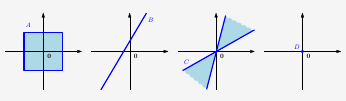

Fig.6 Not all subsets of R2 are subspaces. In A and C, the closure property is violated; B does not contain 0. Only D is a subspace.

**Example 2.12 (Vector Subspaces)**

Let's consider some examples within $\mathbb{R}^2$ (with the usual vector addition and scalar multiplication):

-   For every vector space $V$, the **trivial subspaces** are $V$ itself and $\{\mathbf{0}\}$ (the set containing only the zero vector).

-   Looking at Fig.6:
    -   **A:** A line in $\mathbb{R}^2$ that does not pass through the origin. This is **not a subspace** because it does not contain the zero vector.
    -   **B:** A region in $\mathbb{R}^2$ (e.g., the first quadrant including the axes). This is **not a subspace** because it is not closed under scalar multiplication (e.g., multiplying a vector in the first quadrant by a negative scalar results in a vector outside the first quadrant).
    -   **C:** A circle centered at the origin in $\mathbb{R}^2$. This is **not a subspace** because it is not closed under vector addition (e.g., adding two vectors on the circle might result in a vector outside the circle) and not closed under scalar multiplication (e.g., multiplying a vector on the circle by a scalar with absolute value not equal to 1 will result in a vector not on the circle).
    -   **D:** A line passing through the origin in $\mathbb{R}^2$. This **is a subspace** because it contains the zero vector, and it is closed under both scalar multiplication (scaling a vector on the line keeps it on the line) and vector addition (adding two vectors on the line results in a vector on the line).

-   The **solution set of a homogeneous system of linear equations** $A\mathbf{x} = \mathbf{0}$ with $n$ unknowns $\mathbf{x} = [x_1, \ldots, x_n]^\top$ is a subspace of $\mathbb{R}^n$. This is because the zero vector is always a solution, and if $\mathbf{x}$ and $\mathbf{y}$ are solutions, then $A(\lambda \mathbf{x}) = \lambda (A\mathbf{x}) = \lambda \mathbf{0} = \mathbf{0}$ and $A(\mathbf{x} + \mathbf{y}) = A\mathbf{x} + A\mathbf{y} = \mathbf{0} + \mathbf{0} = \mathbf{0}$, satisfying the closure properties.

-   The **solution set of an inhomogeneous system of linear equations** $A\mathbf{x} = \mathbf{b}$, where $\mathbf{b} \neq \mathbf{0}$, is **not a subspace** of $\mathbb{R}^n$ because it does not contain the zero vector (since $A\mathbf{0} = \mathbf{0} \neq \mathbf{b}$).

-   The **intersection of arbitrarily many subspaces** of a vector space $V$ is itself a subspace of $V$. If $\{U_i\}_{i \in I}$ is a collection of subspaces of $V$, then their intersection $\bigcap_{i \in I} U_i$ is non-empty (it contains the zero vector), and it is closed under scalar multiplication and vector addition because if $\mathbf{x}, \mathbf{y} \in \bigcap_{i \in I} U_i$, then $\mathbf{x}, \mathbf{y} \in U_i$ for all $i \in I$. Since each $U_i$ is a subspace, $\lambda \mathbf{x} \in U_i$ and $\mathbf{x} + \mathbf{y} \in U_i$ for all $i \in I$, which means $\lambda \mathbf{x} \in \bigcap_{i \in I} U_i$ and $\mathbf{x} + \mathbf{y} \in \bigcap_{i \in I} U_i$.

In [9]:
def is_vector_subspace_core(V, U, add_func, scalar_mult_func, zero_vector_func):
    """
    Checks if a subset U of a vector space V is a vector subspace.

    Args:
        V (list of lists or other representation): The vector space (for context).
        U (list of lists or other representation): The subset to check.
        add_func (callable): Function to perform vector addition.
        scalar_mult_func (callable): Function to perform scalar multiplication.
        zero_vector_func (callable): Function to get the zero vector of V.

    Returns:
        bool: True if U is a subspace of V, False otherwise.
    """
    if not U:
        print("Subset U is empty.")
        return False

    # 1. U is non-empty (already checked) and contains the zero vector of V
    zero_v = zero_vector_func(V[0]) if V else None
    if zero_v is None or zero_v not in U:
        print("Zero vector of V is not in U.")
        return False
    print("U contains the zero vector.")

    # 2. Closure of U:
    # a. Closure under scalar multiplication
    scalar_example = 2  # Test with an example scalar
    vector_u_example = U[0]
    scaled_vector = scalar_mult_func(scalar_example, vector_u_example)
    if scaled_vector not in V or scaled_vector not in U:
        print(f"U is not closed under scalar multiplication (e.g., {scalar_example} * {vector_u_example} = {scaled_vector} not in U).")
        return False
    print("U is closed under scalar multiplication (checked for an example).")

    # b. Closure under vector addition
    if len(U) >= 2:
        vector_u1_example = U[0]
        vector_u2_example = U[1]
        sum_vector = add_func(vector_u1_example, vector_u2_example)
        if sum_vector not in V or sum_vector not in U:
            print(f"U is not closed under vector addition (e.g., {vector_u1_example} + {vector_u2_example} = {sum_vector} not in U).")
            return False
        print("U is closed under vector addition (checked for an example).")
    elif len(U) < 2:
        print("Cannot fully check closure under addition with fewer than two elements in U.")

    return True

def zero_vector_rn_core(example_vector):
    """Returns the zero vector of the same dimension as the example vector in Rn."""
    return [0] * len(example_vector)

def zero_matrix_rmn_core(example_matrix):
    """Returns the zero matrix of the same dimension as the example matrix in Rm x n."""
    rows = len(example_matrix)
    cols = len(example_matrix[0]) if rows > 0 else 0
    return [[0 for _ in range(cols)] for _ in range(rows)]

def zero_complex_core(example_complex):
    """Returns the zero complex number (0, 0)."""
    return (0, 0)

if __name__ == '__main__':
    # Example 1: A line through the origin in R^2 (is a subspace)
    V_r2 = [[-2, -1], [-1, -0.5], [0, 0], [1, 0.5], [2, 1]]  # Part of R^2
    U_line = [[-2, -1], [0, 0], [2, 1]]  # Line y = 0.5x

    print("Checking if U_line is a subspace of V_r2 (part of R^2):")
    if is_vector_subspace_core(V_r2, U_line, vector_add_rn_core, scalar_multiply_rn_core, zero_vector_rn_core):
        print("U_line is likely a subspace of V_r2 (based on checks).")
    else:
        print("U_line is not a subspace of V_r2 (based on checks).")
    print("-" * 30)

    # Example 2: A line not through the origin in R^2 (is not a subspace)
    U_line_no_zero = [[1, 1], [2, 2.5], [0, 0.5]]

    print("Checking if U_line_no_zero is a subspace of V_r2:")
    if is_vector_subspace_core(V_r2, U_line_no_zero, vector_add_rn_core, scalar_multiply_rn_core, zero_vector_rn_core):
        print("U_line_no_zero is likely a subspace of V_r2 (based on checks).")
    else:
        print("U_line_no_zero is not a subspace of V_r2 (based on checks).")
    print("-" * 30)

    # Example 3: Solution set of homogeneous equation (conceptual - requires solving the system)
    # Let's consider a simple case: x + y = 0 in R^2
    solution_set_homogeneous = [[1, -1], [-1, 1], [0, 0], [2, -2]]
    V_r2_again = [[-2, 2], [-1, 1], [0, 0], [1, -1], [2, -2]]

    print("Checking if solution_set_homogeneous (of x + y = 0) is a subspace of V_r2_again:")
    if is_vector_subspace_core(V_r2_again, solution_set_homogeneous, vector_add_rn_core, scalar_multiply_rn_core, zero_vector_rn_core):
        print("solution_set_homogeneous is likely a subspace (based on checks).")
    else:
        print("solution_set_homogeneous is not a subspace (based on checks).")
    print("-" * 30)

    # Example 4: Solution set of inhomogeneous equation (conceptual - requires solving the system)
    # Let's consider x + y = 1 in R^2
    solution_set_inhomogeneous = [[1, 0], [0, 1], [0.5, 0.5], [2, -1]]
    V_r2_third = [[-1, 2], [0, 1], [0.5, 0.5], [1, 0], [2, -1]]

    print("Checking if solution_set_inhomogeneous (of x + y = 1) is a subspace of V_r2_third:")
    if is_vector_subspace_core(V_r2_third, solution_set_inhomogeneous, vector_add_rn_core, scalar_multiply_rn_core, zero_vector_rn_core):
        print("solution_set_inhomogeneous is likely a subspace (based on checks).")
    else:
        print("solution_set_inhomogeneous is not a subspace (based on checks).")

Checking if U_line is a subspace of V_r2 (part of R^2):
U contains the zero vector.
U is not closed under scalar multiplication (e.g., 2 * [-2, -1] = [-4, -2] not in U).
U_line is not a subspace of V_r2 (based on checks).
------------------------------
Checking if U_line_no_zero is a subspace of V_r2:
Zero vector of V is not in U.
U_line_no_zero is not a subspace of V_r2 (based on checks).
------------------------------
Checking if solution_set_homogeneous (of x + y = 0) is a subspace of V_r2_again:
U contains the zero vector.
U is closed under scalar multiplication (checked for an example).
U is closed under vector addition (checked for an example).
solution_set_homogeneous is likely a subspace (based on checks).
------------------------------
Checking if solution_set_inhomogeneous (of x + y = 1) is a subspace of V_r2_third:
Zero vector of V is not in U.
solution_set_inhomogeneous is not a subspace (based on checks).


**Remark.** Every subspace $U \subseteq (\mathbb{R}^n, +, \cdot)$ is the solution space of a homogeneous system of linear equations $A\mathbf{x} = \mathbf{0}$ for $\mathbf{x} \in \mathbb{R}^n$. $\diamond$

## 2.5 Linear Independence

In this section, we will examine the capabilities we have when working with vectors (elements of a vector space). Specifically, we can perform vector addition and scalar multiplication. The closure property of a vector space guarantees that the result of these operations will always be another vector within the same vector space.

It is often possible to find a specific set of vectors within a vector space such that every other vector in that space can be expressed by adding together scaled versions of these vectors. Such a set is called a basis, which we will discuss in Section 2.6.1. Before we can define a basis, we need to introduce the concepts of linear combinations and linear independence.

**Definition 2.11 (Linear Combination).** Consider a vector space $V$ and a finite number of vectors $\mathbf{x}_1, \ldots, \mathbf{x}_k \in V$. Then, any vector $\mathbf{v} \in V$ of the form:

$$
\mathbf{v} = \lambda_1 \mathbf{x}_1 + \cdots + \lambda_k \mathbf{x}_k = \sum_{i=1}^{k} \lambda_i \mathbf{x}_i \in V \quad (2.65)
$$

where $\lambda_1, \ldots, \lambda_k \in \mathbb{R}$ are scalars, is called a **linear combination** of the vectors $\mathbf{x}_1, \ldots, \mathbf{x}_k$.

The zero vector $\mathbf{0}$ can always be written as a linear combination of any $k$ vectors $\mathbf{x}_1, \ldots, \mathbf{x}_k$, because $\mathbf{0} = \sum_{i=1}^{k} 0 \mathbf{x}_i$ is always true.

In the following, we are particularly interested in **non-trivial linear combinations** of a set of vectors that result in the zero vector. A non-trivial linear combination means a linear combination of vectors $\mathbf{x}_1, \ldots, \mathbf{x}_k$ where not all the coefficients $\lambda_i$ in (2.65) are equal to zero.

**Definition 2.12 (Linear (In)dependence).** Let $V$ be a vector space with $k \in \mathbb{N}$ and $\mathbf{x}_1, \ldots, \mathbf{x}_k \in V$.

-   If there exists a **non-trivial linear combination** such that $\mathbf{0} = \sum_{i=1}^{k} \lambda_i \mathbf{x}_i$ with at least one $\lambda_i \neq 0$, then the vectors $\mathbf{x}_1, \ldots, \mathbf{x}_k$ are **linearly dependent**.

-   If only the **trivial solution** exists, i.e., $\lambda_1 = \cdots = \lambda_k = 0$ is the only way to satisfy $\mathbf{0} = \sum_{i=1}^{k} \lambda_i \mathbf{x}_i$, then the vectors $\mathbf{x}_1, \ldots, \mathbf{x}_k$ are **linearly independent**.

Linear independence is a fundamental concept in linear algebra. Intuitively, a set of linearly independent vectors contains no redundancy. This means that no vector in the set can be expressed as a linear combination of the other vectors in the set. If we remove any vector from a linearly independent set, we lose the ability to represent certain vectors in their span. Throughout the next sections, we will formalize this intuition more precisely.

**Example 2.13 (Linearly Dependent Vectors)**

A geographic example can help illustrate the concept of linear independence. Imagine a person in Nairobi (Kenya) describing the location of Kigali (Rwanda). They might say, "You can get to Kigali by first going 506 km Northwest to Kampala (Uganda) and then 374 km Southwest." This information is sufficient to locate Kigali relative to Nairobi.

In [ ]:
def are_linearly_dependent_core(vectors):
    """
    Checks if a list of vectors (lists) are linearly dependent using Gaussian elimination.

    Args:
        vectors (list of lists): A list of vectors, where each vector is a list of numbers.

    Returns:
        bool: True if the vectors are linearly dependent, False otherwise.
    """
    if not vectors:
        return False
    num_vectors = len(vectors)
    vector_dimension = len(vectors[0])

    # If we have more vectors than the dimension, they must be linearly dependent
    if num_vectors > vector_dimension:
        return True

    # Create a matrix where each column is a vector
    matrix = [list(v) for v in zip(*vectors)]

    # Perform Gaussian elimination to find the rank of the matrix
    rows = len(matrix)
    cols = len(matrix[0]) if rows > 0 else 0
    lead = 0
    rank = 0
    for r in range(rows):
        if lead >= cols:
            break
        i = r
        while abs(matrix[i][lead]) < 1e-9:
            i += 1
            if i == rows:
                i = r
                lead += 1
                if lead == cols:
                    break
                continue
        matrix[r], matrix[i] = matrix[i], matrix[r]
        lv = matrix[r][lead]
        if abs(lv) > 1e-9:
            matrix[r] = [x / lv for x in matrix[r]]
            rank += 1
            for i in range(rows):
                if i != r:
                    lv = matrix[i][lead]
                    matrix[i] = [x - lv * y for x, y in zip(matrix[i], matrix[r])]
        lead += 1

    # If the rank of the matrix (number of non-zero rows after RREF) is less
    # than the number of vectors, then the vectors are linearly dependent.
    return rank < num_vectors

if __name__ == '__main__':
    # Example 1: Linearly dependent vectors in R^2
    v1 = [1, 2]
    v2 = [2, 4]
    v3 = [-1, -2]
    dependent_set = [v1, v2, v3]
    print(f"Vectors: {dependent_set}")
    if are_linearly_dependent_core(dependent_set):
        print("The vectors are linearly dependent.")
    else:
        print("The vectors are linearly independent.")
    print("-" * 30)

    # Example 2: Linearly independent vectors in R^2
    v4 = [1, 0]
    v5 = [0, 1]
    independent_set = [v4, v5]
    print(f"Vectors: {independent_set}")
    if are_linearly_dependent_core(independent_set):
        print("The vectors are linearly dependent.")
    else:
        print("The vectors are linearly independent.")
    print("-" * 30)

    # Example 3: Linearly dependent vectors in R^3
    v6 = [1, 0, 0]
    v7 = [0, 1, 0]
    v8 = [1, 1, 0]
    dependent_set_r3 = [v6, v7, v8]
    print(f"Vectors: {dependent_set_r3}")
    if are_linearly_dependent_core(dependent_set_r3):
        print("The vectors are linearly dependent.")
    else:
        print("The vectors are linearly independent.")
    print("-" * 30)

    # Example 4: Linearly independent vectors in R^3
    v9 = [1, 0, 0]
    v10 = [0, 1, 0]
    v11 = [0, 0, 1]
    independent_set_r3 = [v9, v10, v11]
    print(f"Vectors: {independent_set_r3}")
    if are_linearly_dependent_core(independent_set_r3):
        print("The vectors are linearly dependent.")
    else:
        print("The vectors are linearly independent.")
    print("-" * 30)

    # Example 5: More vectors than dimension (must be dependent)
    v12 = [1, 2]
    v13 = [3, 4]
    v14 = [5, 6]
    more_vectors = [v12, v13, v14]
    print(f"Vectors: {more_vectors}")
    if are_linearly_dependent_core(more_vectors):
        print("The vectors are linearly dependent.")
    else:
        print("The vectors are linearly independent.")
    print("-" * 30)

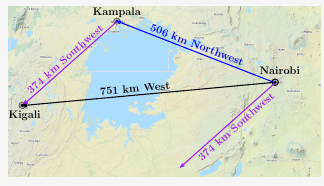

Fig.7 Geographic example (with crude approximations to cardinal directions) of linearly dependent vectors in a two-dimensional space (plane).

... to describe the location of Kigali because the geographic coordinate system can be approximated as a two-dimensional vector space (neglecting altitude and the Earth's curvature). The person then adds, "It is about 751 km West of here." While this last statement is true, it is redundant given the previous information (see Figure 2.7).

In this example, the "506 km Northwest" vector (blue) and the "374 km Southwest" vector (purple) are **linearly independent**. This means that the Southwest vector cannot be expressed as a scalar multiple of the Northwest vector, and vice versa. However, the third "751 km West" vector (black) is a **linear combination** of the other two vectors, making the set of three vectors **linearly dependent**. Equivalently, the "751 km West" and "374 km Southwest" vectors can be linearly combined to obtain the "506 km Northwest" vector.

``` 
import matplotlib.pyplot as plt
import numpy as np

# Approximate vector directions and magnitudes
nairobi = np.array([0, 0])
kampala_dir = np.array([-1/np.sqrt(2), 1/np.sqrt(2)]) # Northwest (approx)
kampala = nairobi + 506 * kampala_dir
kigali_dir = np.array([-1/np.sqrt(2), -1/np.sqrt(2)]) # Southwest (approx)
kigali_from_kampala = kampala + 374 * kigali_dir
kigali_west_dir = np.array([-1, 0])
kigali_west = nairobi + 751 * kigali_west_dir

plt.figure(figsize=(8, 8))
plt.quiver(nairobi[0], nairobi[1], kampala[0], kampala[1], angles='xy', scale_units='xy', scale=1, color='blue', label='506 km Northwest')
plt.quiver(kampala[0], kampala[1], kigali_from_kampala[0] - kampala[0], kigali_from_kampala[1] - kampala[1], angles='xy', scale_units='xy', scale=1, color='purple', label='374 km Southwest')
plt.quiver(nairobi[0], nairobi[1], kigali_west[0], kigali_west[1], angles='xy', scale_units='xy', scale=1, color='black', label='751 km West')

plt.scatter(*nairobi, color='green', label='Nairobi')
plt.scatter(*kampala, color='red', label='Kampala')
plt.scatter(*kigali_from_kampala, color='orange', label='Kigali (via Kampala)')
plt.scatter(*kigali_west, color='gray', label='Kigali (West)')

plt.xlabel("East (+), West (-)")
plt.ylabel("North (+), South (-)")
plt.title("Geographic Vectors (Approximate)")
plt.grid(True)
plt.legend()
plt.xlim(-800, 100)
plt.ylim(-500, 600)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [13]:
def are_linearly_independent_gaussian_elimination_core(vectors):
    """
    Checks if a list of vectors (lists) are linearly independent using
    Gaussian elimination (row echelon form).

    Args:
        vectors (list of lists): A list of vectors, where each vector is a list of numbers.

    Returns:
        bool: True if the vectors are linearly independent, False otherwise.
    """
    if not vectors:
        return True
    num_vectors = len(vectors)
    vector_dimension = len(vectors[0])

    # If we have more vectors than the dimension, they must be linearly dependent
    if num_vectors > vector_dimension:
        return False

    # Create a matrix where each column is a vector
    matrix = [list(v) for v in zip(*vectors)]
    rows = len(matrix)
    cols = len(matrix[0]) if rows > 0 else 0
    lead = 0
    rank = 0
    for r in range(rows):
        if lead >= cols:
            break
        i = r
        while abs(matrix[i][lead]) < 1e-9:
            i += 1
            if i == rows:
                i = r
                lead += 1
                if lead == cols:
                    break
                continue

        if lead < cols:  # Ensure lead is within the column bounds
            matrix[r], matrix[i] = matrix[i], matrix[r]
            lv = matrix[r][lead]
            if abs(lv) > 1e-9:
                rank += 1
                for i in range(rows):
                    if i != r:
                        factor = matrix[i][lead] / lv
                        matrix[i] = [x - factor * y for x, y in zip(matrix[i], matrix[r])]
            lead += 1
        else:
            break  # No more pivots can be found

    # The vectors are linearly independent if and only if the rank of the
    # matrix is equal to the number of vectors.
    return rank == num_vectors

if __name__ == '__main__':
    # Example 1: Linearly dependent vectors in R^2
    v1 = [1, 2]
    v2 = [2, 4]
    v3 = [-1, -2]
    dependent_set = [v1, v2, v3]
    print(f"Vectors: {dependent_set}")
    if are_linearly_independent_gaussian_elimination_core(dependent_set):
        print("The vectors are linearly independent.")
    else:
        print("The vectors are linearly dependent.")
    print("-" * 30)

    # Example 2: Linearly independent vectors in R^2
    v4 = [1, 0]
    v5 = [0, 1]
    independent_set = [v4, v5]
    print(f"Vectors: {independent_set}")
    if are_linearly_independent_gaussian_elimination_core(independent_set):
        print("The vectors are linearly independent.")
    else:
        print("The vectors are linearly dependent.")
    print("-" * 30)

    # Example 3: Linearly dependent vectors in R^3
    v6 = [1, 0, 0]
    v7 = [0, 1, 0]
    v8 = [1, 1, 0]
    dependent_set_r3 = [v6, v7, v8]
    print(f"Vectors: {dependent_set_r3}")
    if are_linearly_independent_gaussian_elimination_core(dependent_set_r3):
        print("The vectors are linearly independent.")
    else:
        print("The vectors are linearly dependent.")
    print("-" * 30)

    # Example 4: Linearly independent vectors in R^3
    v9 = [1, 0, 0]
    v10 = [0, 1, 0]
    v11 = [0, 0, 1]
    independent_set_r3 = [v9, v10, v11]
    print(f"Vectors: {independent_set_r3}")
    if are_linearly_independent_gaussian_elimination_core(independent_set_r3):
        print("The vectors are linearly independent.")
    else:
        print("The vectors are linearly dependent.")
    print("-" * 30)

    # Example 5: More vectors than dimension (must be dependent)
    v12 = [1, 2]
    v13 = [3, 4]
    v14 = [5, 6]
    more_vectors = [v12, v13, v14]
    print(f"Vectors: {more_vectors}")
    if are_linearly_independent_gaussian_elimination_core(more_vectors):
        print("The vectors are linearly independent.")
    else:
        print("The vectors are linearly dependent.")
    print("-" * 30)

Vectors: [[1, 2], [2, 4], [-1, -2]]
The vectors are linearly dependent.
------------------------------
Vectors: [[1, 0], [0, 1]]
The vectors are linearly independent.
------------------------------
Vectors: [[1, 0, 0], [0, 1, 0], [1, 1, 0]]
The vectors are linearly dependent.
------------------------------
Vectors: [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
The vectors are linearly independent.
------------------------------
Vectors: [[1, 2], [3, 4], [5, 6]]
The vectors are linearly dependent.
------------------------------


- The **pivot columns** in the row echelon form of the matrix (formed by the vectors as columns) indicate the vectors that are linearly independent of the vectors to their left in the original set. Note that the linear independence identified is dependent on the order in which the vectors were placed as columns in the matrix.

- The **non-pivot columns** can be expressed as linear combinations of the pivot columns that appear to their left in the row echelon form.

For example, consider the following row echelon form of a matrix:

$$
\begin{bmatrix}
1 & 3 & 0 \\
0 & 0 & 2
\end{bmatrix} \quad (2.66)
$$

Here, the first column (containing the first leading 1) and the third column (containing the second leading 2, after scaling to 1 would be a pivot) are pivot columns. The second column is a non-pivot column. Notice that the second column is 3 times the first column in the original (or transformed) matrix. This indicates that the second vector in the original set is linearly dependent on the first.

**All column vectors are linearly independent if and only if all columns are pivot columns.** If there is at least one non-pivot column, then the columns (and therefore, the corresponding vectors in the original set) are linearly dependent.

$\diamond$

**Example 2.14**

Consider the following vectors in $\mathbb{R}^4$:

$$
\mathbf{x}_1 = \begin{bmatrix} 1 \\ 2 \\ -3 \\ 4 \end{bmatrix}, \quad \mathbf{x}_2 = \begin{bmatrix} 1 \\ 1 \\ 0 \\ 2 \end{bmatrix}, \quad \mathbf{x}_3 = \begin{bmatrix} -1 \\ -2 \\ 1 \\ 1 \end{bmatrix} \quad (2.67)
$$

To check whether these vectors are linearly dependent, we follow the general approach and solve the equation:

$$
\lambda_1 \mathbf{x}_1 + \lambda_2 \mathbf{x}_2 + \lambda_3 \mathbf{x}_3 = \lambda_1 \begin{bmatrix} 1 \\ 2 \\ -3 \\ 4 \end{bmatrix} + \lambda_2 \begin{bmatrix} 1 \\ 1 \\ 0 \\ 2 \end{bmatrix} + \lambda_3 \begin{bmatrix} -1 \\ -2 \\ 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \end{bmatrix} \quad (2.68)
$$

for the scalars $\lambda_1, \lambda_2, \lambda_3$. We form a matrix with the vectors $\mathbf{x}_1, \mathbf{x}_2, \mathbf{x}_3$ as its columns and apply elementary row operations to bring it to row echelon form:

$$
\begin{bmatrix}
1 & 1 & -1 \\
2 & 1 & -2 \\
-3 & 0 & 1 \\
4 & 2 & 1
\end{bmatrix} \xrightarrow{\cdots} \begin{bmatrix}
1 & 1 & -1 \\
0 & -1 & 0 \\
0 & 3 & -2 \\
0 & -2 & 5
\end{bmatrix} \xrightarrow{\cdots} \begin{bmatrix}
1 & 1 & -1 \\
0 & 1 & 0 \\
0 & 0 & -2 \\
0 & 0 & 5
\end{bmatrix} \xrightarrow{\cdots} \begin{bmatrix}
1 & 1 & -1 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
0 & 0 & 0
\end{bmatrix} \quad (2.69)
$$

In the final row echelon form, every column of the matrix contains a pivot (the leading non-zero entry in each non-zero row). Therefore, there are no non-pivot columns. This implies that the only solution to the homogeneous system of linear equations is the trivial solution: $\lambda_1 = 0, \lambda_2 = 0, \lambda_3 = 0$. Hence, the vectors $\mathbf{x}_1, \mathbf{x}_2, \mathbf{x}_3$ are **linearly independent**.

In [14]:
def get_rank_gaussian_elimination_core(matrix):
    """
    Calculates the rank of a matrix using Gaussian elimination (row echelon form).

    Args:
        matrix (list of lists): The matrix.

    Returns:
        int: The rank of the matrix.
    """
    rows = len(matrix)
    if not rows:
        return 0
    cols = len(matrix[0])
    lead = 0
    rank = 0
    current_matrix = [list(row) for row in matrix]  # Create a mutable copy

    for r in range(rows):
        if lead >= cols:
            break
        i = r
        while abs(current_matrix[i][lead]) < 1e-9:
            i += 1
            if i == rows:
                i = r
                lead += 1
                if lead == cols:
                    return rank
                continue
        current_matrix[r], current_matrix[i] = current_matrix[i], current_matrix[r]
        lv = current_matrix[r][lead]
        if abs(lv) > 1e-9:
            rank += 1
            for i in range(rows):
                if i != r:
                    factor = current_matrix[i][lead] / lv
                    current_matrix[i] = [x - factor * y for x, y in zip(current_matrix[i], current_matrix[r])]
        lead += 1
    return rank

def are_linearly_independent_rank_core(vectors):
    """
    Checks if a list of vectors (lists) are linearly independent by checking the rank
    of the matrix formed by these vectors.

    Args:
        vectors (list of lists): A list of vectors, where each vector is a list of numbers.

    Returns:
        bool: True if the vectors are linearly independent, False otherwise.
    """
    if not vectors:
        return True
    num_vectors = len(vectors)
    if not vectors[0]:  # Handle case of empty vectors
        return num_vectors == 0
    vector_dimension = len(vectors[0])

    # Create a matrix where each column is a vector
    matrix = [list(v) for v in zip(*vectors)]

    rank = get_rank_gaussian_elimination_core(matrix)

    # The vectors are linearly independent if and only if the rank of the matrix
    # is equal to the number of vectors.
    return rank == num_vectors

if __name__ == '__main__':
    # Example 1: Linearly dependent vectors in R^2
    v1 = [1, 2]
    v2 = [2, 4]
    v3 = [-1, -2]
    dependent_set = [v1, v2, v3]
    print(f"Vectors: {dependent_set}")
    if are_linearly_independent_rank_core(dependent_set):
        print("The vectors are linearly independent.")
    else:
        print("The vectors are linearly dependent.")
    print("-" * 30)

    # Example 2: Linearly independent vectors in R^2
    v4 = [1, 0]
    v5 = [0, 1]
    independent_set = [v4, v5]
    print(f"Vectors: {independent_set}")
    if are_linearly_independent_rank_core(independent_set):
        print("The vectors are linearly independent.")
    else:
        print("The vectors are linearly dependent.")
    print("-" * 30)

    # Example 3: Linearly dependent vectors in R^3
    v6 = [1, 0, 0]
    v7 = [0, 1, 0]
    v8 = [1, 1, 0]
    dependent_set_r3 = [v6, v7, v8]
    print(f"Vectors: {dependent_set_r3}")
    if are_linearly_independent_rank_core(dependent_set_r3):
        print("The vectors are linearly independent.")
    else:
        print("The vectors are linearly dependent.")
    print("-" * 30)

    # Example 4: Linearly independent vectors in R^3
    v9 = [1, 0, 0]
    v10 = [0, 1, 0]
    v11 = [0, 0, 1]
    independent_set_r3 = [v9, v10, v11]
    print(f"Vectors: {independent_set_r3}")
    if are_linearly_independent_rank_core(independent_set_r3):
        print("The vectors are linearly independent.")
    else:
        print("The vectors are linearly dependent.")
    print("-" * 30)

    # Example 5: More vectors than dimension (must be dependent)
    v12 = [1, 2]
    v13 = [3, 4]
    v14 = [5, 6]
    more_vectors = [v12, v13, v14]
    print(f"Vectors: {more_vectors}")
    if are_linearly_independent_rank_core(more_vectors):
        print("The vectors are linearly independent.")
    else:
        print("The vectors are linearly dependent.")
    print("-" * 30)

    # Example from the text (Example 2.14)
    x1 = [1, 2, -3, 4]
    x2 = [1, 1, 0, 2]
    x3 = [-1, -2, 1, 1]
    example_2_14 = [x1, x2, x3]
    print(f"Vectors from Example 2.14: {example_2_14}")
    if are_linearly_independent_rank_core(example_2_14):
        print("The vectors are linearly independent.")
    else:
        print("The vectors are linearly dependent.")

Vectors: [[1, 2], [2, 4], [-1, -2]]
The vectors are linearly dependent.
------------------------------
Vectors: [[1, 0], [0, 1]]
The vectors are linearly independent.
------------------------------
Vectors: [[1, 0, 0], [0, 1, 0], [1, 1, 0]]
The vectors are linearly dependent.
------------------------------
Vectors: [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
The vectors are linearly independent.
------------------------------
Vectors: [[1, 2], [3, 4], [5, 6]]
The vectors are linearly dependent.
------------------------------
Vectors from Example 2.14: [[1, 2, -3, 4], [1, 1, 0, 2], [-1, -2, 1, 1]]
The vectors are linearly independent.
